In [11]:
# Celda 1: Importación de librerías y configuración inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import glob
import os
from fpdf import FPDF

warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Librerías importadas y configuradas correctamente")

✅ Librerías importadas y configuradas correctamente


In [12]:
# Celda 2: Configuración de rutas y carga de datos
carpeta = r"D:\Proyectos\Proyectos-Jupyter\TP3_tienda\csv_tiendita"

# Buscar archivos CSV
archivos_csv = glob.glob(os.path.join(carpeta, "*.csv"))

if not archivos_csv:
    print("❌ No se encontraron archivos CSV en la carpeta especificada.")
else:
    print(f"📁 Se encontraron {len(archivos_csv)} archivos CSV:")

# Crear carpetas de salida
carpetas = ["Excels_Individuales", "Graficos_Combinados", "Informe_Combinado"]
carpetas_rutas = {nombre: os.path.join(carpeta, nombre) for nombre in carpetas}

for carpeta_ruta in carpetas_rutas.values():
    os.makedirs(carpeta_ruta, exist_ok=True)

print("✅ Carpetas de salida creadas")

📁 Se encontraron 11 archivos CSV:
✅ Carpetas de salida creadas


In [13]:
# Celda 3: Carga de datasets
datasets = {}
archivos_esperados = {
    'clientes', 'condicion_iva', 'facturas_detalle', 'facturas_encabezado',
    'localidades', 'productos', 'proveedores', 'provincias', 'rubros', 
    'sucursales', 'ventas'
}

for archivo in archivos_csv:
    nombre_archivo = os.path.basename(archivo)
    nombre_dataset = nombre_archivo.replace('.csv', '')
    try:
        datasets[nombre_dataset] = pd.read_csv(archivo)
        print(f"✓ Cargado: {nombre_archivo}")
    except Exception as e:
        print(f"✗ Error cargando {nombre_archivo}: {e}")

# Verificación
archivos_cargados = set(datasets.keys())
archivos_faltantes = archivos_esperados - archivos_cargados

if not archivos_faltantes:
    print("\n✅ Todos los datasets fueron cargados exitosamente!")
else:
    print(f"\n⚠️  Faltan {len(archivos_faltantes)} datasets:")
    for faltante in archivos_faltantes:
        print(f"   - {faltante}")

✓ Cargado: clientes.csv
✓ Cargado: condicion_iva.csv
✓ Cargado: facturas_detalle.csv
✓ Cargado: facturas_encabezado.csv
✓ Cargado: localidades.csv
✓ Cargado: productos.csv
✓ Cargado: proveedores.csv
✓ Cargado: provincias.csv
✓ Cargado: rubros.csv
✓ Cargado: sucursales.csv
✓ Cargado: ventas.csv

✅ Todos los datasets fueron cargados exitosamente!


In [14]:
# Celda 4: Preparación de datos para análisis
# Unir datos de ventas
ventas_completas = pd.merge(datasets['ventas'], datasets['facturas_encabezado'], on='id_factura')
ventas_completas['fecha_venta'] = pd.to_datetime(ventas_completas['fecha_venta'])
ventas_completas['mes'] = ventas_completas['fecha_venta'].dt.month
ventas_completas['semana'] = ventas_completas['fecha_venta'].dt.isocalendar().week
ventas_completas['nombre_mes'] = ventas_completas['fecha_venta'].dt.month_name()

# Preparar datos de productos
productos_ventas = pd.merge(datasets['facturas_detalle'], datasets['productos'], on='id_producto')
productos_ventas = pd.merge(productos_ventas, datasets['rubros'], on='id_rubro')

# Preparar datos de clientes
clientes_ventas = pd.merge(datasets['clientes'], ventas_completas, on='id_cliente')
clientes_localidades = pd.merge(datasets['clientes'], datasets['localidades'], on='id_localidad')
clientes_provincias = pd.merge(clientes_localidades, datasets['provincias'], on='id_provincia')

print("✅ Datos preparados para análisis")

✅ Datos preparados para análisis


📊 Generando gráficos de ventas...


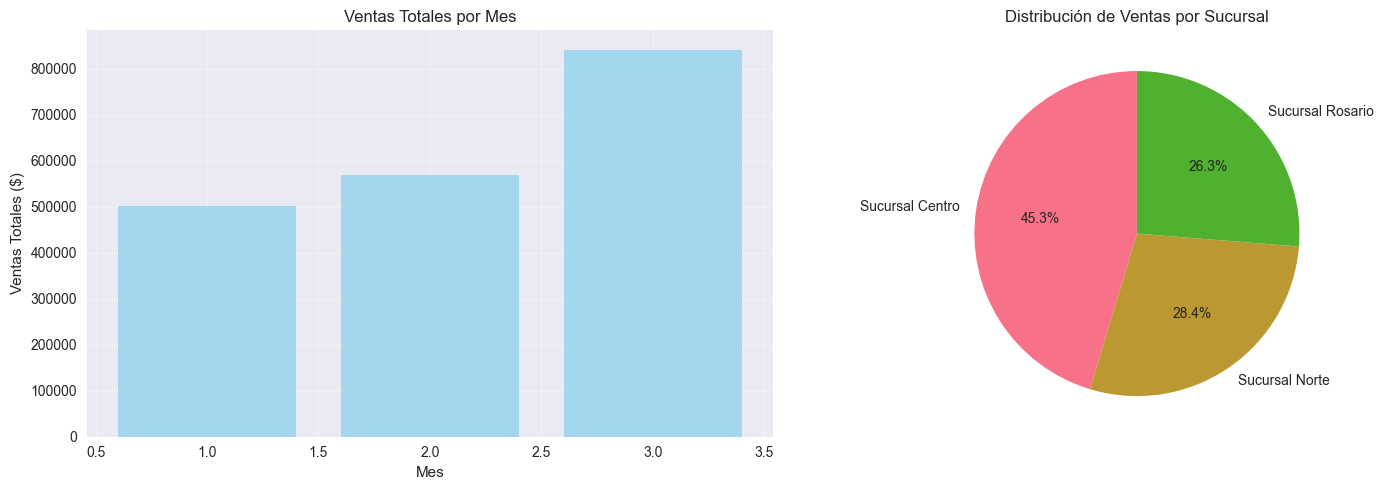

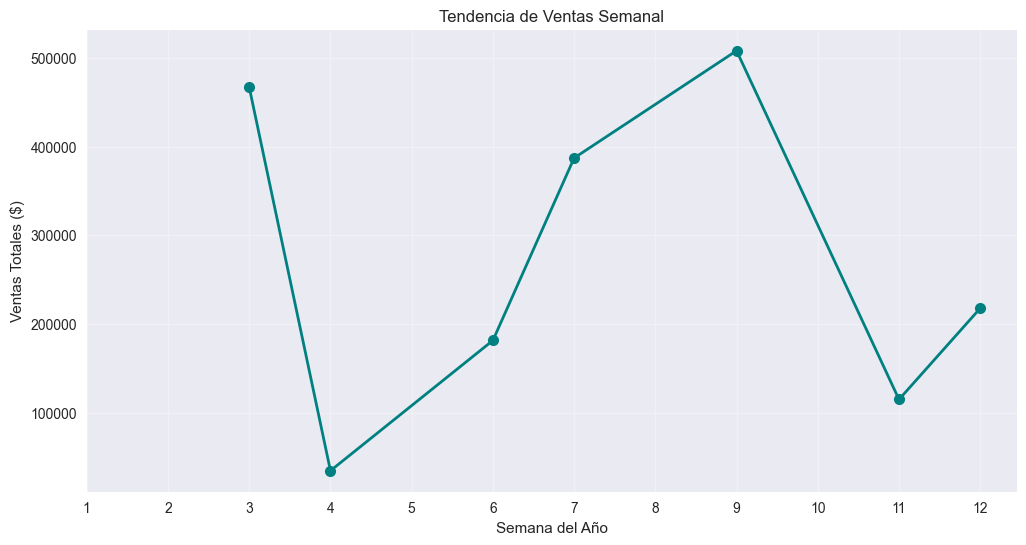

✅ Gráficos de ventas generados


In [15]:
# Celda 5: Generación de gráficos de ventas
print("📊 Generando gráficos de ventas...")

# Ventas por mes y sucursal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ventas_por_mes = ventas_completas.groupby('mes')['monto'].sum()
ax1.bar(ventas_por_mes.index, ventas_por_mes.values, color='skyblue', alpha=0.7)
ax1.set_title('Ventas Totales por Mes')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Ventas Totales ($)')
ax1.grid(True, alpha=0.3)

ventas_por_sucursal = ventas_completas.groupby('id_sucursal')['monto'].sum()
sucursales_nombres = datasets['sucursales'].set_index('id_sucursal')['nombre']
labels_sucursales = [sucursales_nombres.get(i, f'Sucursal {i}') for i in ventas_por_sucursal.index]

ax2.pie(ventas_por_sucursal.values, labels=labels_sucursales, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribución de Ventas por Sucursal')

plt.tight_layout()
plt.savefig(os.path.join(carpetas_rutas['Graficos_Combinados'], 'ventas_mes_sucursal.png'), dpi=300, bbox_inches='tight')
plt.show()

# Tendencia de ventas semanal
plt.figure(figsize=(12, 6))
ventas_por_semana = ventas_completas.groupby('semana')['monto'].sum()
ventas_por_semana = ventas_por_semana[(ventas_por_semana.index >= 1) & (ventas_por_semana.index <= 12)]

plt.plot(ventas_por_semana.index, ventas_por_semana.values, marker='o', linewidth=2, markersize=8, color='teal')
plt.title('Tendencia de Ventas Semanal')
plt.xlabel('Semana del Año')
plt.ylabel('Ventas Totales ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))

plt.savefig(os.path.join(carpetas_rutas['Graficos_Combinados'], 'tendencia_ventas_semanal.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos de ventas generados")

👥 Generando gráficos de clientes...


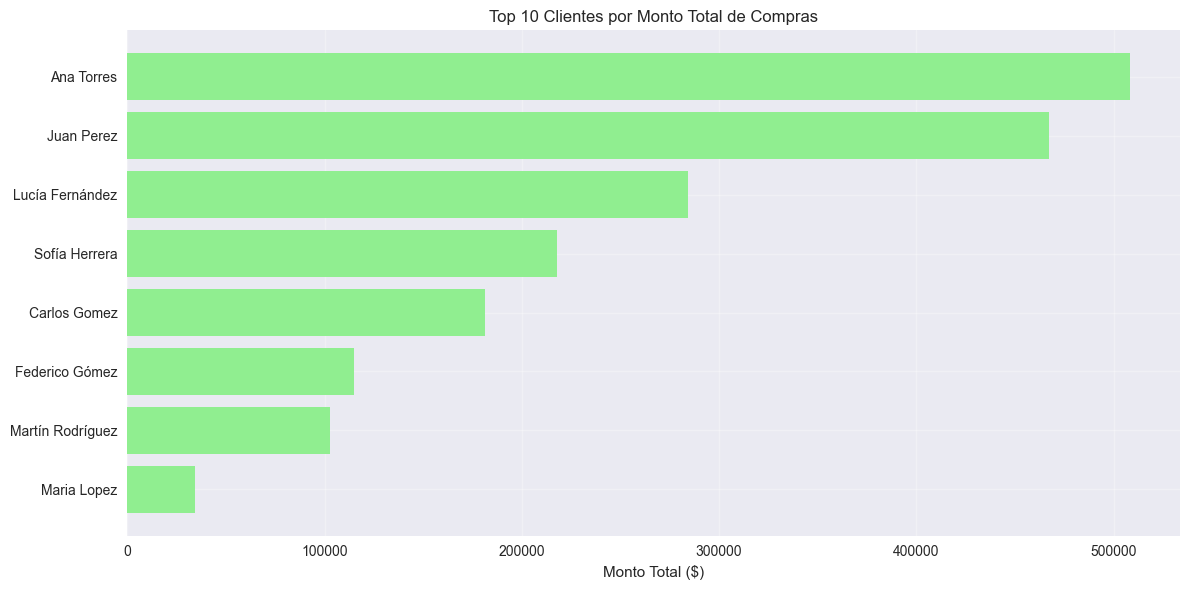

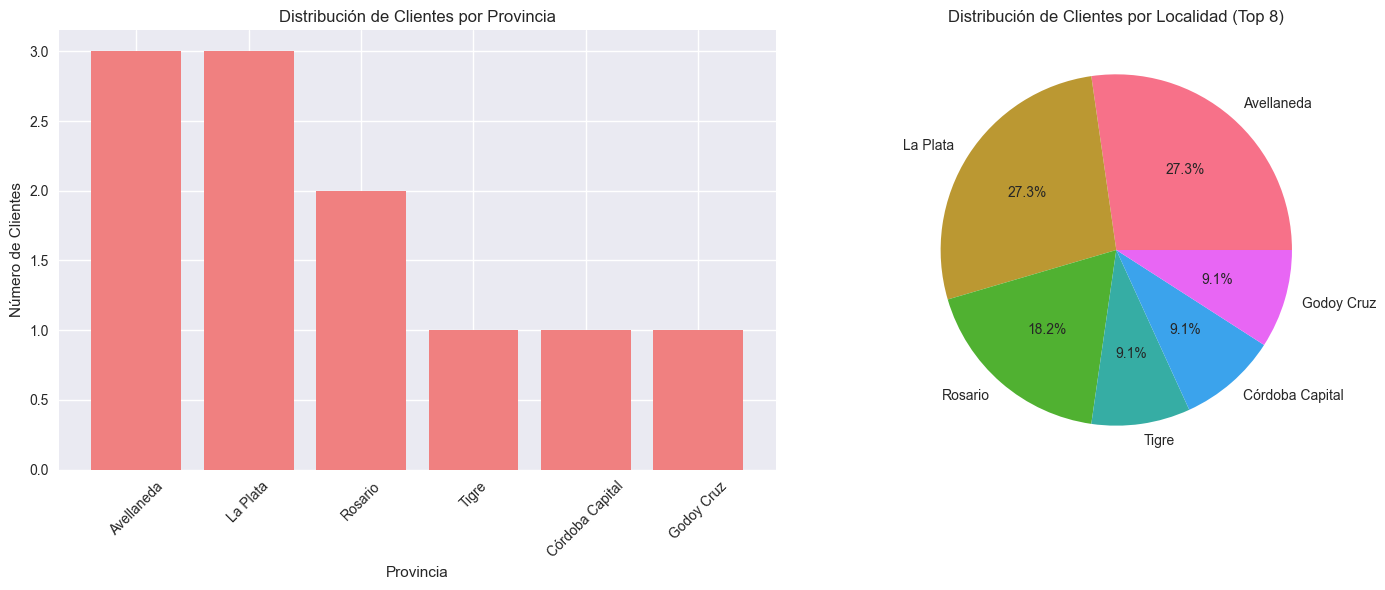

✅ Gráficos de clientes generados


In [16]:
# Celda 6: Generación de gráficos de clientes
print("👥 Generando gráficos de clientes...")

# Top clientes
top_clientes = clientes_ventas.groupby(['id_cliente', 'nombre', 'apellido'])['monto'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
nombres_completos = [f"{row[1]} {row[2]}" for row in top_clientes.index]
plt.barh(nombres_completos, top_clientes.values, color='lightgreen')
plt.title('Top 10 Clientes por Monto Total de Compras')
plt.xlabel('Monto Total ($)')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(carpetas_rutas['Graficos_Combinados'], 'top_clientes.png'), dpi=300, bbox_inches='tight')
plt.show()

# Distribución geográfica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

clientes_por_provincia = clientes_provincias['nombre_y'].value_counts()
ax1.bar(clientes_por_provincia.index, clientes_por_provincia.values, color='lightcoral')
ax1.set_title('Distribución de Clientes por Provincia')
ax1.set_xlabel('Provincia')
ax1.set_ylabel('Número de Clientes')
ax1.tick_params(axis='x', rotation=45)

clientes_por_localidad = clientes_localidades['nombre_y'].value_counts().head(8)
ax2.pie(clientes_por_localidad.values, labels=clientes_por_localidad.index, autopct='%1.1f%%')
ax2.set_title('Distribución de Clientes por Localidad (Top 8)')

plt.tight_layout()
plt.savefig(os.path.join(carpetas_rutas['Graficos_Combinados'], 'distribucion_clientes.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos de clientes generados")

📦 Generando gráficos de productos...


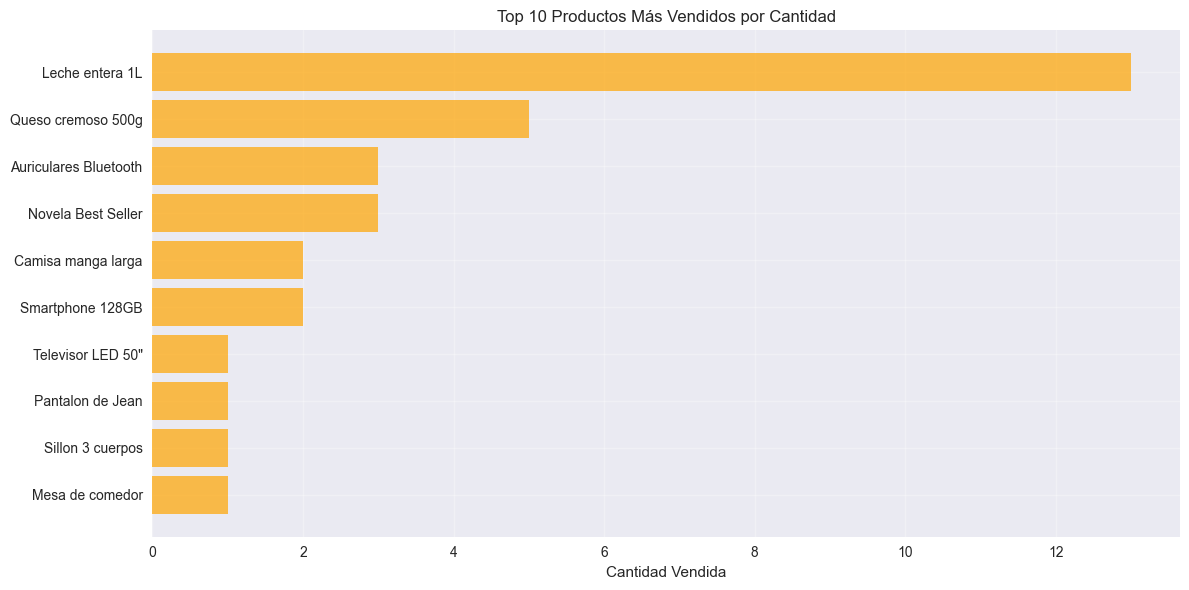

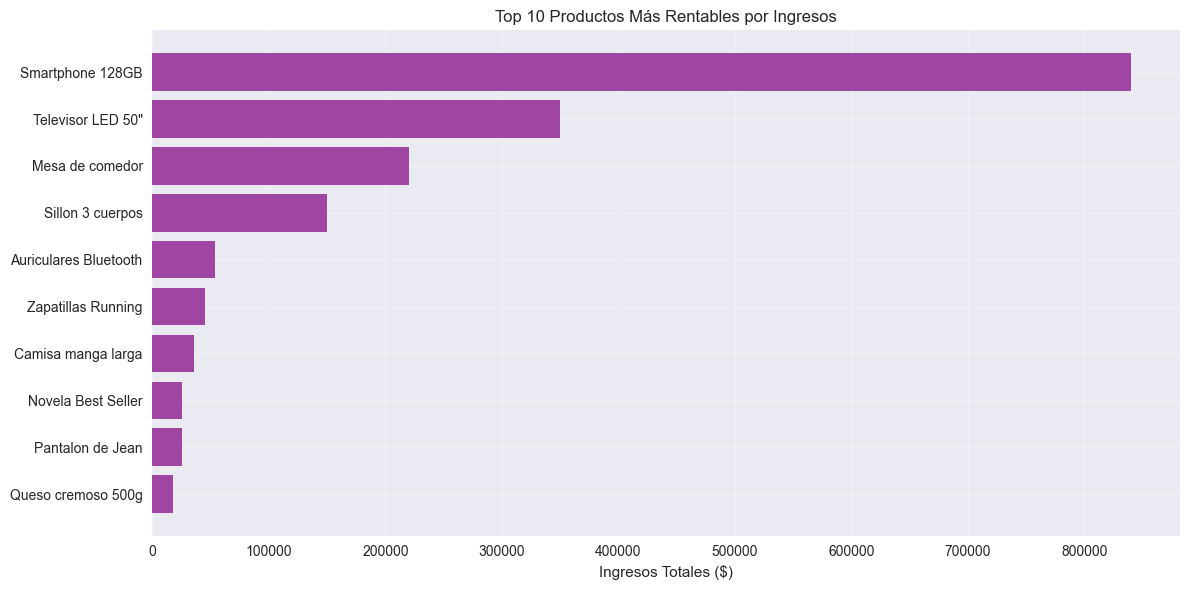

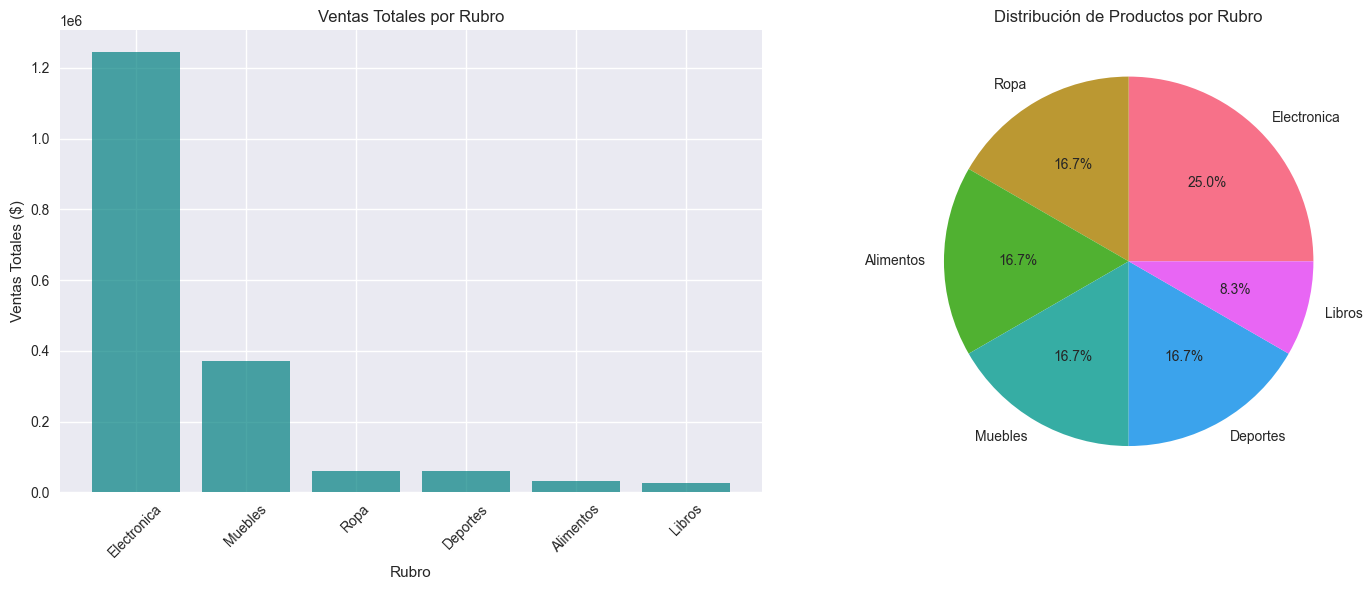

✅ Gráficos de productos generados


In [17]:
# Celda 7: Generación de gráficos de productos
print("📦 Generando gráficos de productos...")

# Productos más vendidos
productos_mas_vendidos = productos_ventas.groupby(['id_producto', 'descripcion_x'])['cantidad'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh([desc[:30] + '...' if len(desc) > 30 else desc for desc in productos_mas_vendidos.index.get_level_values(1)], 
         productos_mas_vendidos.values, color='orange', alpha=0.7)
plt.title('Top 10 Productos Más Vendidos por Cantidad')
plt.xlabel('Cantidad Vendida')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(carpetas_rutas['Graficos_Combinados'], 'productos_mas_vendidos.png'), dpi=300, bbox_inches='tight')
plt.show()

# Productos más rentables
productos_rentables = productos_ventas.groupby(['id_producto', 'descripcion_x'])['subtotal_linea'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh([desc[:30] + '...' if len(desc) > 30 else desc for desc in productos_rentables.index.get_level_values(1)], 
         productos_rentables.values, color='purple', alpha=0.7)
plt.title('Top 10 Productos Más Rentables por Ingresos')
plt.xlabel('Ingresos Totales ($)')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(carpetas_rutas['Graficos_Combinados'], 'productos_mas_rentables.png'), dpi=300, bbox_inches='tight')
plt.show()

# Análisis por rubros
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ventas_por_rubro = productos_ventas.groupby('descripcion_y')['subtotal_linea'].sum().sort_values(ascending=False)
ax1.bar(ventas_por_rubro.index, ventas_por_rubro.values, color='teal', alpha=0.7)
ax1.set_title('Ventas Totales por Rubro')
ax1.set_xlabel('Rubro')
ax1.set_ylabel('Ventas Totales ($)')
ax1.tick_params(axis='x', rotation=45)

productos_por_rubro = datasets['productos'].groupby('id_rubro')['id_producto'].count()
productos_por_rubro.index = productos_por_rubro.index.map(lambda x: datasets['rubros'][datasets['rubros']['id_rubro'] == x]['descripcion'].values[0])
ax2.pie(productos_por_rubro.values, labels=productos_por_rubro.index, autopct='%1.1f%%')
ax2.set_title('Distribución de Productos por Rubro')

plt.tight_layout()
plt.savefig(os.path.join(carpetas_rutas['Graficos_Combinados'], 'analisis_rubros.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos de productos generados")

📈 Generando gráficos adicionales y PDF...


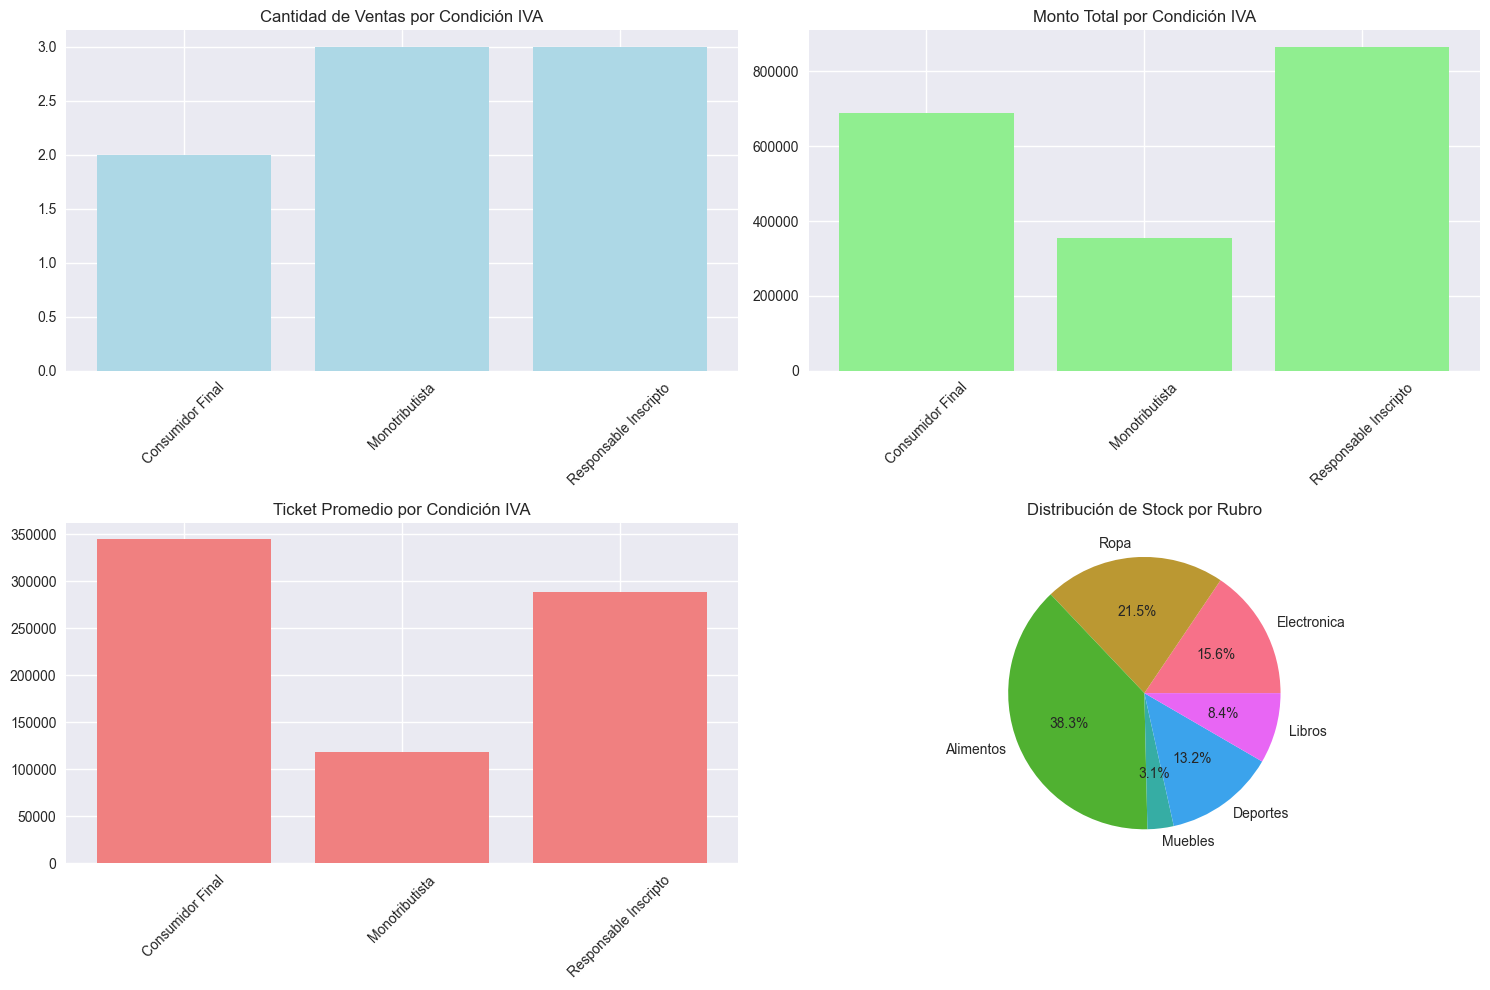

✅ Gráficos adicionales generados


In [18]:
# Celda 8: Gráficos adicionales y generación de PDF
print("📈 Generando gráficos adicionales y PDF...")

# Gráficos adicionales
condicion_ventas = pd.merge(ventas_completas, datasets['condicion_iva'], on='id_condicion_iva')
comportamiento_iva = condicion_ventas.groupby('descripcion')['monto'].agg(['count', 'sum', 'mean']).round(2)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].bar(comportamiento_iva.index, comportamiento_iva['count'], color='lightblue')
axes[0,0].set_title('Cantidad de Ventas por Condición IVA')
axes[0,0].tick_params(axis='x', rotation=45)

axes[0,1].bar(comportamiento_iva.index, comportamiento_iva['sum'], color='lightgreen')
axes[0,1].set_title('Monto Total por Condición IVA')
axes[0,1].tick_params(axis='x', rotation=45)

axes[1,0].bar(comportamiento_iva.index, comportamiento_iva['mean'], color='lightcoral')
axes[1,0].set_title('Ticket Promedio por Condición IVA')
axes[1,0].tick_params(axis='x', rotation=45)

stock_rubro = datasets['productos'].groupby('id_rubro')['stock'].sum()
stock_rubro.index = stock_rubro.index.map(lambda x: datasets['rubros'][datasets['rubros']['id_rubro'] == x]['descripcion'].values[0])
axes[1,1].pie(stock_rubro.values, labels=stock_rubro.index, autopct='%1.1f%%')
axes[1,1].set_title('Distribución de Stock por Rubro')

plt.tight_layout()
plt.savefig(os.path.join(carpetas_rutas['Graficos_Combinados'], 'analisis_adicionales.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos adicionales generados")

In [22]:
# Celda 10: Finalización del PDF y guardado (OPTIMIZADA CON REPORTLAB)
print("📄 Creando informe PDF optimizado con ReportLab...")

try:
    from reportlab.lib.pagesizes import A4
    from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, Image
    from reportlab.lib.styles import getSampleStyleSheet
    from reportlab.lib import colors
    from reportlab.lib.units import inch
    import tempfile
    import shutil

    # Crear directorio temporal para imágenes optimizadas
    temp_img_folder = tempfile.mkdtemp()
    
    # Función para optimizar imágenes para PDF
    def optimizar_imagen_para_pdf(archivo_original, archivo_destino, ancho=6*inch):
        from PIL import Image as PILImage
        try:
            img = PILImage.open(archivo_original)
            # Calcular altura proporcional
            ratio = img.height / img.width
            alto = ancho * ratio
            
            # Guardar optimizada
            img.save(archivo_destino, 'PNG', dpi=(150, 150), optimize=True)
            return archivo_destino, ancho, alto
        except Exception as e:
            print(f"⚠️ Error optimizando {archivo_original}: {e}")
            return archivo_original, 6*inch, 4*inch

    # Optimizar imágenes principales
    imagenes_optimizadas = {}
    for img_name in ['ventas_mes_sucursal.png', 'tendencia_ventas_semanal.png', 
                    'top_clientes.png', 'distribucion_clientes.png',
                    'productos_mas_vendidos.png', 'analisis_rubros.png',
                    'analisis_adicionales.png']:
        original_path = os.path.join(carpetas_rutas['Graficos_Combinados'], img_name)
        if os.path.exists(original_path):
            temp_path = os.path.join(temp_img_folder, img_name)
            archivo, ancho, alto = optimizar_imagen_para_pdf(original_path, temp_path)
            imagenes_optimizadas[img_name] = (archivo, ancho, alto)
            print(f"✓ Optimizada: {img_name}")

    # Crear el documento PDF
    salida_pdf_analisis = os.path.join(carpetas_rutas['Informe_Combinado'], "Informe_Analisis_Completo.pdf")
    doc = SimpleDocTemplate(salida_pdf_analisis, pagesize=A4)
    styles = getSampleStyleSheet()
    contenido = []

    # Título principal
    contenido.append(Paragraph("INFORME EJECUTIVO - ANÁLISIS COMPLETO DE TIENDA", styles['Heading1']))
    contenido.append(Spacer(1, 12))
    contenido.append(Paragraph(f"Generado el: {datetime.now().strftime('%d/%m/%Y %H:%M')}", styles['Normal']))
    contenido.append(Spacer(1, 20))

    # RESUMEN EJECUTIVO
    contenido.append(Paragraph("RESUMEN EJECUTIVO", styles['Heading2']))
    
    # Métricas principales en tabla
    datos_metricas = [
        ['Métrica', 'Valor'],
        ['Ventas Totales', f"${datasets['ventas']['monto'].sum():,.2f}"],
        ['Venta Promedio', f"${datasets['ventas']['monto'].mean():,.2f}"],
        ['Total Clientes', f"{len(datasets['clientes']):,}"],
        ['Total Productos', f"{len(datasets['productos']):,}"],
        ['Sucursal Líder', f"{labels_sucursales[0]}"],
        ['Período Analizado', f"{ventas_completas['fecha_venta'].min().strftime('%d/%m/%Y')} a {ventas_completas['fecha_venta'].max().strftime('%d/%m/%Y')}"]
    ]
    
    tabla_metricas = Table(datos_metricas, colWidths=[3*inch, 3*inch])
    tabla_metricas.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#2c3e50')),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, 0), 12),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.HexColor('#ecf0f1')),
        ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),
        ('FONTSIZE', (0, 1), (-1, -1), 10),
        ('GRID', (0, 0), (-1, -1), 1, colors.grey)
    ]))
    
    contenido.append(tabla_metricas)
    contenido.append(Spacer(1, 15))

    # ANÁLISIS DE VENTAS
    contenido.append(Paragraph("ANÁLISIS DE VENTAS", styles['Heading2']))
    contenido.append(Paragraph("Distribución de ventas por mes y sucursal:", styles['Normal']))
    
    if 'ventas_mes_sucursal.png' in imagenes_optimizadas:
        img_path, ancho, alto = imagenes_optimizadas['ventas_mes_sucursal.png']
        img = Image(img_path, width=ancho, height=alto)
        img.hAlign = 'CENTER'
        contenido.append(img)
        contenido.append(Spacer(1, 10))
    
    contenido.append(Paragraph("Tendencia de ventas semanal:", styles['Normal']))
    
    if 'tendencia_ventas_semanal.png' in imagenes_optimizadas:
        img_path, ancho, alto = imagenes_optimizadas['tendencia_ventas_semanal.png']
        img = Image(img_path, width=ancho, height=alto)
        img.hAlign = 'CENTER'
        contenido.append(img)
    
    # Conclusiones ventas
    conclusiones_ventas = [
        f"• Ventas totales: ${ventas_completas['monto'].sum():,.2f}",
        f"• Mes con mayores ventas: Mes {ventas_por_mes.idxmax()} (${ventas_por_mes.max():,.2f})",
        f"• Sucursal líder: {labels_sucursales[ventas_por_sucursal.idxmax()]} ({ventas_por_sucursal.max()/ventas_por_sucursal.sum()*100:.1f}% del total)",
        f"• Tendencia semanal muestra patrones estacionales claros"
    ]
    
    for conclusion in conclusiones_ventas:
        contenido.append(Paragraph(conclusion, styles['Normal']))
    
    contenido.append(Spacer(1, 15))

    # ANÁLISIS DE CLIENTES
    contenido.append(Paragraph("ANÁLISIS DE CLIENTES", styles['Heading2']))
    contenido.append(Paragraph("Top 10 clientes por volumen de compras:", styles['Normal']))
    
    if 'top_clientes.png' in imagenes_optimizadas:
        img_path, ancho, alto = imagenes_optimizadas['top_clientes.png']
        img = Image(img_path, width=ancho, height=alto)
        img.hAlign = 'CENTER'
        contenido.append(img)
        contenido.append(Spacer(1, 10))
    
    contenido.append(Paragraph("Distribución geográfica de clientes:", styles['Normal']))
    
    if 'distribucion_clientes.png' in imagenes_optimizadas:
        img_path, ancho, alto = imagenes_optimizadas['distribucion_clientes.png']
        img = Image(img_path, width=ancho, height=alto)
        img.hAlign = 'CENTER'
        contenido.append(img)
    
    # Conclusiones clientes
    conclusiones_clientes = [
        f"• Cliente top: {top_clientes.index[0][1]} {top_clientes.index[0][2]} (${top_clientes.iloc[0]:,.2f})",
        f"• Total clientes únicos: {len(datasets['clientes']):,}",
        f"• Provincia principal: {clientes_por_provincia.index[0]} ({clientes_por_provincia.iloc[0]} clientes)",
        f"• Distribución en {len(clientes_por_provincia)} provincias diferentes"
    ]
    
    for conclusion in conclusiones_clientes:
        contenido.append(Paragraph(conclusion, styles['Normal']))
    
    contenido.append(Spacer(1, 15))

    # ANÁLISIS DE PRODUCTOS
    contenido.append(Paragraph("ANÁLISIS DE PRODUCTOS", styles['Heading2']))
    contenido.append(Paragraph("Productos más vendidos por cantidad:", styles['Normal']))
    
    if 'productos_mas_vendidos.png' in imagenes_optimizadas:
        img_path, ancho, alto = imagenes_optimizadas['productos_mas_vendidos.png']
        img = Image(img_path, width=ancho, height=alto)
        img.hAlign = 'CENTER'
        contenido.append(img)
        contenido.append(Spacer(1, 10))
    
    contenido.append(Paragraph("Distribución por rubros:", styles['Normal']))
    
    if 'analisis_rubros.png' in imagenes_optimizadas:
        img_path, ancho, alto = imagenes_optimizadas['analisis_rubros.png']
        img = Image(img_path, width=ancho, height=alto)
        img.hAlign = 'CENTER'
        contenido.append(img)
    
    # Conclusiones productos
    conclusiones_productos = [
        f"• Producto más vendido: {productos_mas_vendidos.index[0][1][:40]}... ({productos_mas_vendidos.iloc[0]:,} unidades)",
        f"• Producto más rentable: {productos_rentables.index[0][1][:40]}... (${productos_rentables.iloc[0]:,.2f})",
        f"• Rubro líder en ventas: {ventas_por_rubro.index[0]} (${ventas_por_rubro.iloc[0]:,.2f})",
        f"• Stock total gestionado: {datasets['productos']['stock'].sum():,} unidades"
    ]
    
    for conclusion in conclusiones_productos:
        contenido.append(Paragraph(conclusion, styles['Normal']))
    
    contenido.append(Spacer(1, 15))

    # ANÁLISIS ADICIONALES
    contenido.append(Paragraph("ANÁLISIS ADICIONALES", styles['Heading2']))
    
    if 'analisis_adicionales.png' in imagenes_optimizadas:
        img_path, ancho, alto = imagenes_optimizadas['analisis_adicionales.png']
        img = Image(img_path, width=ancho, height=alto)
        img.hAlign = 'CENTER'
        contenido.append(img)
    
    # Comportamiento por condición IVA
    contenido.append(Paragraph("Comportamiento por condición IVA:", styles['Heading3']))
    
    datos_iva = [['Condición IVA', 'Cant. Ventas', 'Monto Total', 'Ticket Promedio']]
    for idx, row in comportamiento_iva.iterrows():
        datos_iva.append([
            idx, 
            f"{row['count']:,}", 
            f"${row['sum']:,.2f}", 
            f"${row['mean']:,.2f}"
        ])
    
    tabla_iva = Table(datos_iva, colWidths=[1.5*inch, 1.5*inch, 1.5*inch, 1.5*inch])
    tabla_iva.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#34495e')),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, 0), 10),
        ('BACKGROUND', (0, 1), (-1, -1), colors.HexColor('#f8f9fa')),
        ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),
        ('FONTSIZE', (0, 1), (-1, -1), 9),
        ('GRID', (0, 0), (-1, -1), 0.5, colors.grey)
    ]))
    
    contenido.append(tabla_iva)
    contenido.append(Spacer(1, 15))

    # RECOMENDACIONES ESTRATÉGICAS
    contenido.append(Paragraph("RECOMENDACIONES ESTRATÉGICAS", styles['Heading2']))
    
    recomendaciones = [
        "🎯 ENFOCAR esfuerzos comerciales en la sucursal líder y replicar sus mejores prácticas",
        "🤝 DESARROLLAR programas de fidelización para los clientes top identificados", 
        "📦 OPTIMIZAR inventario incrementando stock de productos más vendidos y rentables",
        "🌎 EXPANDIR presencia en regiones con menor penetración de clientes",
        "💰 FORTALECER promociones en rubros con mayor potencial de crecimiento",
        "📊 PERSONALIZAR estrategias por condición de IVA para maximizar ingresos",
        "📈 MONITOREAR continuamente la tendencia semanal para ajustar estrategias",
        "🔄 DIVERSIFICAR productos en rubros con menor representación pero alto potencial"
    ]
    
    for recomendacion in recomendaciones:
        contenido.append(Paragraph(recomendacion, styles['Normal']))
    
    contenido.append(Spacer(1, 10))

    # INFORMACIÓN TÉCNICA
    contenido.append(Paragraph("INFORMACIÓN TÉCNICA", styles['Heading2']))
    contenido.append(Paragraph(f"• Total de datasets analizados: {len(datasets)}", styles['Normal']))
    contenido.append(Paragraph(f"• Período de análisis: {ventas_completas['fecha_venta'].min().strftime('%d/%m/%Y')} a {ventas_completas['fecha_venta'].max().strftime('%d/%m/%Y')}", styles['Normal']))
    contenido.append(Paragraph(f"• Sucursales analizadas: {len(datasets['sucursales'])}", styles['Normal']))
    contenido.append(Paragraph(f"• Productos en catálogo: {len(datasets['productos'])}", styles['Normal']))
    contenido.append(Paragraph("• Método: Análisis descriptivo y exploratorio de datos", styles['Normal']))

    # Generar el PDF
    print("🔄 Generando documento PDF...")
    doc.build(contenido)
    
    # Limpiar archivos temporales
    shutil.rmtree(temp_img_folder)
    
    print(f"✅ Informe PDF generado exitosamente: {salida_pdf_analisis}")
    print("🎉 Proceso completado exitosamente!")

except Exception as e:
    print(f"❌ Error al generar PDF: {e}")
    print("⚠️ Continuando sin generar PDF...")

📄 Creando informe PDF optimizado con ReportLab...
✓ Optimizada: ventas_mes_sucursal.png
✓ Optimizada: tendencia_ventas_semanal.png
✓ Optimizada: top_clientes.png
✓ Optimizada: distribucion_clientes.png
✓ Optimizada: productos_mas_vendidos.png
✓ Optimizada: analisis_rubros.png
✓ Optimizada: analisis_adicionales.png
🔄 Generando documento PDF...
✅ Informe PDF generado exitosamente: D:\Proyectos\Proyectos-Jupyter\TP3_tienda\csv_tiendita\Informe_Combinado\Informe_Analisis_Completo.pdf
🎉 Proceso completado exitosamente!
